Chapter 9 Files and Exceptions 
# Task 1 
# 9.3 *Text- File Processing

9.3.1 Writing to a Text File: Introducing the with Statement

In [52]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')



In [53]:
!more accounts.txt


100 Jones 24.98
200 Doe 345.67
300 White 0.00
400 Stone -42.16
500 Rich 224.62


9.3.2 Reading Data from a Text File

In [54]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')


Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


9.4 Updating Text Files 

In [55]:
accounts = open('accounts.txt', 'r')


In [56]:
temp_file = open('temp_file.txt', 'w')


In [57]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')


In [58]:
import os


In [59]:
os.remove('accounts.txt')


In [60]:
os.rename('temp_file.txt', 'accounts.txt')


In [61]:
!more accounts.txt


100 Jones 24.98
200 Doe 345.67
300 Williams 0.00
400 Stone -42.16
500 Rich 224.62


9.5 Serialization with JSON

JSON DATA FORMAT
Python Standard Library Module json 

In [62]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}


Serializing an Object to JSON

In [65]:
import json


In [67]:
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)


Deserializing the JSON Text 

In [68]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)


In [69]:
accounts_json


{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [70]:
accounts_json['accounts']


[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [71]:
accounts_json['accounts'][1]


{'account': 200, 'name': 'Doe', 'balance': 345.67}

Displaying the JSON Text 

In [72]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))


{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


9.8 Handling Exceptions 
9.8.1 Division by Zero and Invalid Input 

In [73]:
10 / 0


ZeroDivisionError: division by zero

9.8.2 Try Statements 

In [74]:
# dividebyzero.py
"""Simple exception handling example."""

while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError:  # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError:  # denominator was 0
        print('Attempted to divide by zero\n')
    else:  # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break  # terminate the loop


Attempted to divide by zero

You must enter two integers

100.000 / 7.000 = 14.286


9.8.3 Catching Mutiple Exceptions in ne except Clause
If sveral except suites are identical, it is possible to catch those exception types by specifiying them as a tuple in a single except handler, as in 
*except ( type1, type2,....) as variable_name*

9.8.4 What Exceptions Does a Function or Method Raise?
Exceptions may surface via statements in a try suite, via functions or methods called directly or indirectly from a try suit, or via the python interpreter 
as it executes the code( for example, ZeroDivisionErrors)

9.8.5 What Code Should Be Placed in a try Suite?
A. If any exception of the specified type occurs during the execution of the try block suite, it will be caught by the corresponding except block.

9.9 Finally Clause 
The Finally clause of the try Statement 

In [75]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')


try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [76]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')


try suite that raises an exception
a ValueError occurred
finally always executes


Combining with Statements abd try ...except Statements 

In [77]:
open('gradez.txt')


FileNotFoundError: [Errno 2] No such file or directory: 'gradez.txt'

In [78]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')


The file name you specified does not exist


9.12 Intro to Data Science: Working with CSV Files

9.12.1 Python Standard Library Module csv

Writing to a CSV File 

In [84]:
import csv


In [85]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])


Reading from a CSV File 

In [86]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')


Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


9.12.2 Reading CSV Files into Pandas DataFrames

In [87]:
import pandas as pd


In [88]:
df = pd.read_csv('accounts.csv',
                 names=['account', 'name', 'balance'])


In [89]:
df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


TO Save a DataFrame to a file using CSV format, call DataFrame method to_csv: 

In [91]:
df.to_csv('accounts_from_dataframe.csv', index=False)


9.12.3 Reading the Titanic Disaster Dataset


Loading the Titanic Dataset Via a URL 

In [92]:
import pandas as pd


In [93]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
                      'Rdatasets/csv/carData/TitanicSurvival.csv')


Viewing Some of the Rows in the Titanic Dataset

In [98]:
pd.set_option('display.precision', 2)  # format for floating-point values


In [96]:
titanic.head()


,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [97]:
titanic.tail()


,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


Customizing the Columns Names 

In [99]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']


In [100]:
titanic.head()


,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [101]:
titanic.tail()


,name,survived,sex,age,class
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


9.12.4 Simple Data Analysis with the Titanic Disaster Datset 

In [102]:
titanic.describe()


,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [103]:
(titanic.survived == 'yes').describe()


count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

9.12.5 Passenger Age Histogram

In [104]:
%matplotlib inline


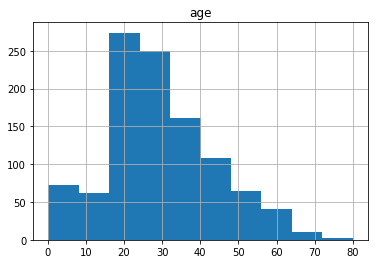

In [105]:
histogram = titanic.hist()


# Task 2 
 17.2 Relational Databases and Structured Query Language (SQL)

In [220]:
import sqlite3


In [221]:
connection = sqlite3.connect(r'C:\Users\15734\Downloads\books (4).db')



# authors Table Viewing the authors Table's Contents

In [222]:
import pandas as pd


In [223]:
pd.options.display.max_columns = 10


In [224]:
pd.read_sql('SELECT * FROM authors', connection,
            index_col=['id'])


,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald


17.2.2 SELECT Queries

In [225]:
pd.read_sql('SELECT first,last FROM authors' , connection)

,first,last
0,Paul,Deitel
1,Harvey,Deitel
2,Abbey,Deitel
3,Dan,Quirk
4,Alexander,Wald


17.2.3 WHERE Clause

In [226]:
pd.read_sql("""SELECT title, edition,copyright FROM titles WHERE copyright > '2016'""",connection)

,title,edition,copyright
0,Intro to Python for CS and DS,1,2020
1,Java How to Program,11,2018
2,Visual C# How to Program,6,2017
3,C++ How to Program,10,2017
4,Android How to Program,3,2017


17.2.4 ORDER BY Clause

In [227]:
pd.read_sql('SELECT title FROM titles ORDER BY title ASC', connection)


,title
0,Android 6 for Programmers
1,Android How to Program
2,C How to Program
3,C++ How to Program
4,Internet & WWW How to Program
5,Intro to Python for CS and DS
6,Java How to Program
7,Visual Basic 2012 How to Program
8,Visual C# How to Program
9,Visual C++ How to Program


17.2.5 Merging Data from Multiple Tables: INNER JOIN

In [228]:
pd.read_sql("""SELECT first, last, isbn FROM authors INNER JOIN author_ISBN ON authors.id = author_ISBN.id ORDER BY last, first""", connection).head()

,first,last,isbn
0,Abbey,Deitel,0132151006
1,Abbey,Deitel,0133406954
2,Harvey,Deitel,0134289366
3,Harvey,Deitel,0135404673
4,Harvey,Deitel,0132151006


17.2.6 INSERT INTO Statement

In [229]:
cursor = connection.cursor()


In [230]:
cursor.execute("""INSERT INTO authors (first, last) VALUES ('Sue', 'Red')""")


In [231]:
pd.read_sql('SELECT id, first, last  FROM authors', connection, index_col=['id'])


,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald
6,Sue,Red


17.2.7 UPDATE Statement

In [232]:
cursor = cursor.execute("""UPDATE authors SET last='Black' WHERE last='Red' AND first='Sue'""")

In [233]:
cursor.rowcount

1

In [234]:
pd.read_sql('SELECT id, first, last FROM authors',
            connection, index_col=['id'])


,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald
6,Sue,Black


17.2.8 DELETE FROM Statement

In [235]:
cursor = cursor.execute('DELETE FROM authors WHERE id=6')

In [236]:
cursor.rowcount

1

In [237]:
pd.read_sql('SELECT id, first, last FROM authors',
            connection, index_col=['id'])


,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald
